# Restaurant Sales Analyis

In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_250 = pd.read_csv('Top250.csv',index_col=0)
df_250.head()

,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
Rank,,,,,,,,
1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


In [3]:
df_250.isna().sum()

Restaurant            0
Content             217
Sales                 0
YOY_Sales             0
Units                 0
YOY_Units             0
Headquarters        198
Segment_Category      0
dtype: int64

In [4]:
df_250 = df_250.drop(['Content','Headquarters'],axis=1) #since over 70% of these data pts are missing
df_250.head()

,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
Rank,,,,,,
1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger
2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe
3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken
4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican
5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger


In [8]:
def remove_punctuation(column):  #trying to remove the % sign and dividing by 100 since it is percentage
    no_punc = [x for x in column if x not in "%"]
    no_punc = "".join(no_punc)
    divide_100 = float(no_punc)/100
    return divide_100

In [9]:
df_250['new_sales_perc'] = df_250['YOY_Sales'].apply(remove_punctuation)

In [10]:
df_250.head()

,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,new_sales_perc
Rank,,,,,,,
1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger,0.049
2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe,0.086
3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken,0.130
4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican,0.090
5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger,0.027


In [11]:
df_250['new_sales'] = df_250['new_sales_perc']*df_250['Sales'] +df_250['Sales']

In [12]:
df_250.head()

,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,new_sales_perc,new_sales
Rank,,,,,,,,
1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger,0.049,42392.188
2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe,0.086,23218.680
3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken,0.130,12791.600
4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican,0.090,12309.370
5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger,0.027,10479.508


In [13]:
df_250['new_units_perc'] = df_250['YOY_Units'].apply(remove_punctuation)

In [14]:
df_250.head()

,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,new_sales_perc,new_sales,new_units_perc
Rank,,,,,,,,,
1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger,0.049,42392.188,-0.005
2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe,0.086,23218.680,0.030
3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken,0.130,12791.600,0.050
4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican,0.090,12309.370,0.027
5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger,0.027,10479.508,0.002


In [15]:
df_250['new_units'] = df_250['new_units_perc']*df_250['Units'] +df_250['Units']

In [16]:
df_250['new_units'] = df_250['new_units'].astype('int')

In [17]:
df_250.head()

,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,new_sales_perc,new_sales,new_units_perc,new_units
Rank,,,,,,,,,,
1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger,0.049,42392.188,-0.005,13776
2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe,0.086,23218.680,0.030,15500
3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken,0.130,12791.600,0.050,2593
4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican,0.090,12309.370,0.027,6948
5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger,0.027,10479.508,0.002,7360


In [18]:
def gain_loss(column):  #calculating gain or loss using the '-' sign
    for x in str(column):
        if(x.startswith('-')):
            return 0  #0 means we have incurred loss
        else:
            return 1

In [19]:
df_250['gl_sales'] = df_250['new_sales_perc'].apply(gain_loss)

In [20]:
df_250['gl_units'] = df_250['new_units_perc'].apply(gain_loss)

In [21]:
df_250.head()

,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,new_sales_perc,new_sales,new_units_perc,new_units,gl_sales,gl_units
Rank,,,,,,,,,,,,
1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger,0.049,42392.188,-0.005,13776,1,0
2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe,0.086,23218.680,0.030,15500,1,1
3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken,0.130,12791.600,0.050,2593,1,1
4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican,0.090,12309.370,0.027,6948,1,1
5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger,0.027,10479.508,0.002,7360,1,1


In [22]:
df = df_250.drop(['YOY_Sales','YOY_Units','new_sales_perc','new_units_perc'],axis=1)
df.head()

,Restaurant,Sales,Units,Segment_Category,new_sales,new_units,gl_sales,gl_units
Rank,,,,,,,,
1,McDonald's,40412,13846,Quick Service & Burger,42392.188,13776,1,0
2,Starbucks,21380,15049,Quick Service & Coffee Cafe,23218.680,15500,1,1
3,Chick-fil-A,11320,2470,Quick Service & Chicken,12791.600,2593,1,1
4,Taco Bell,11293,6766,Quick Service & Mexican,12309.370,6948,1,1
5,Burger King,10204,7346,Quick Service & Burger,10479.508,7360,1,1


In [23]:
df['Segment_Category'].value_counts()

Varied Menu                        22
Mexican                            14
Quick Service & Burger             13
Italian/Pizza                      10
Family Style                       10
Burger                             10
Steak                               9
Pizza                               9
Casual Dining & Varied Menu         9
Seafood                             8
Quick Service & Pizza               8
Bakery Cafe                         8
BBQ                                 7
Sandwich                            7
Family Dining & Family Style        7
Chicken                             7
Fast Casual & Sandwich              6
Sports Bar                          6
Quick Service & Chicken             6
Quick Service & Sandwich            4
Fast Casual & Chicken               4
Coffee Cafe                         4
Casual Dining & Steak               4
Casual Dining & Italian/Pizza       4
Family Casual                       4
Fast Casual & Burger                4
Quick Servic

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


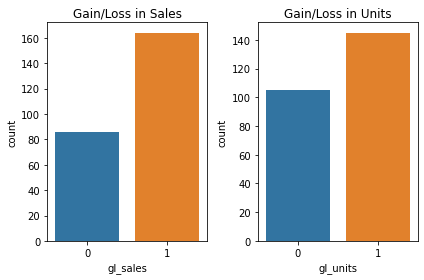

In [25]:
plt.subplot(1,2,1)
plt.title("Gain/Loss in Sales")
sns.countplot(df['gl_sales'])

plt.subplot(1,2,2)
plt.title("Gain/Loss in Units")
sns.countplot(df['gl_units'])

plt.tight_layout()

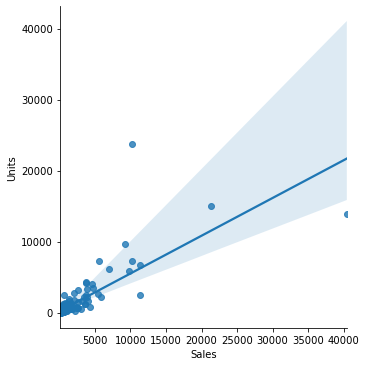

In [29]:
sns.lmplot(x='Sales',y='Units',data=df)

In [32]:
plot1 = df[df["Restaurant"].isin(["McDonald's","Starbucks","Chick-fil-A","Taco Bell","Burger King"
                                  "Subway","Wendy's","Dunkin'","Domino's","Panera Bread"])]
px.line(plot1, 
        x="Sales", 
        y="Units", 
        text="Restaurant",
       title="Sales vs Units for the top 10 Restaurants")

In [33]:
plot2 = df[df["Restaurant"].isin(["McDonald's","Starbucks","Chick-fil-A","Taco Bell","Burger King"
                                  "Subway","Wendy's","Dunkin'","Domino's","Panera Bread","Pizza Hut",
                                  "Chipotle Mexican Grill","Sonic Drive-In","KFC","Olive Garden","Applebee's",
                                  "Panda Express","Arby's","Popeyes Louisiana Kitchen","Little Caesars"])]

In [34]:
px.bar(plot2,
      x='Restaurant',
      y= 'gl_units',
      text = 'Restaurant',
      title = 'Gain or loss in Units sold for top 20 Restaurants')

In [35]:
px.bar(plot2,
      x='Restaurant',
      y= 'gl_sales',
      text = 'Restaurant',
      title = 'Gain or loss in Sales Amount for top 20 Restaurants')

In [36]:
px.bar(df,  #taking a look at the most ordered food type
      x='Segment_Category',
      title = 'Most Ordered Type of Food')